## Social Media Sentiment Analysis (Twitter & Reddit)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmsytsui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmsytsui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn import preprocessing

# 1. Twitter Sentiment Analysis

### Load Data

In [4]:
df_all_crypto_tweets = pd.read_csv('data/all_crypto_tweets.csv')
df_all_crypto_tweets.head()

,tweet_id,date,text,retweet_count,favourite_count,followers_count,crypto_name
0,1.428577e+18,2021-08-20 04:39:25,The second #COVID19 lockdown is how #BTC gets...,1,0.0,155.0,BTC
1,1.428577e+18,2021-08-20 04:38:57,this is a really weird “dead cat bounce” #BTC ...,0,0.0,232.0,BTC
2,1.428577e+18,2021-08-20 04:38:51,@Crypto_Avenger1 @BrianSumner1987 @NanoDogeCoi...,0,0.0,9.0,BTC
3,1.428577e+18,2021-08-20 04:38:46,Goodnight everyone! Happy to see the #Crypto m...,0,0.0,125.0,BTC
4,1.428577e+18,2021-08-20 04:38:40,@Lonely_Boyyy22 @vancattoken Always buy the di...,0,1.0,27.0,BTC


### Preprocessing

We are going to further clean up the dataframe to turn the text into machine-readable format.
The process will include:
- converting all letters into lower case
- lemmatization and stemming the words
- remove stop words

In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [6]:
# remove stopwards, stem and lemmatize text column
def preprocess(text):
    words = [lemmatizer.lemmatize(w) for w in text if w not in stop_words]
    stem_text = " ".join([stemmer.stem(i) for i in words])
    return stem_text

In [7]:
# tokenize text column to create a new column called processed_text
df_all_crypto_tweets['processed_text'] = df_all_crypto_tweets['text'].apply(
    lambda x: preprocess(tokenizer.tokenize(x.lower()))
)

df_all_crypto_tweets.head()

,tweet_id,date,text,retweet_count,favourite_count,followers_count,crypto_name,processed_text
0,1.428577e+18,2021-08-20 04:39:25,The second #COVID19 lockdown is how #BTC gets...,1,0.0,155.0,BTC,second covid19 lockdown btc get 100k
1,1.428577e+18,2021-08-20 04:38:57,this is a really weird “dead cat bounce” #BTC ...,0,0.0,232.0,BTC,realli weird dead cat bounc btc ada eth
2,1.428577e+18,2021-08-20 04:38:51,@Crypto_Avenger1 @BrianSumner1987 @NanoDogeCoi...,0,0.0,9.0,BTC,crypto_avenger1 briansumner1987 nanodogecoin t...
3,1.428577e+18,2021-08-20 04:38:46,Goodnight everyone! Happy to see the #Crypto m...,0,0.0,125.0,BTC,goodnight everyon happi see crypto market look...
4,1.428577e+18,2021-08-20 04:38:40,@Lonely_Boyyy22 @vancattoken Always buy the di...,0,1.0,27.0,BTC,lonely_boyyy22 vancattoken alway buy dip useva...


### Get Sentiment

In [8]:
#!pip install -U textblob
#!python -m textblob.download_corpora

In [9]:
# from processed_text column, get sentiment in number
def getSentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [10]:
df_all_crypto_tweets['polarity'] = df_all_crypto_tweets['processed_text'].apply(lambda x: getSentiment(x))
df_all_crypto_tweets.head()

,tweet_id,date,text,retweet_count,favourite_count,followers_count,crypto_name,processed_text,polarity
0,1.428577e+18,2021-08-20 04:39:25,The second #COVID19 lockdown is how #BTC gets...,1,0.0,155.0,BTC,second covid19 lockdown btc get 100k,0.00
1,1.428577e+18,2021-08-20 04:38:57,this is a really weird “dead cat bounce” #BTC ...,0,0.0,232.0,BTC,realli weird dead cat bounc btc ada eth,-0.35
2,1.428577e+18,2021-08-20 04:38:51,@Crypto_Avenger1 @BrianSumner1987 @NanoDogeCoi...,0,0.0,9.0,BTC,crypto_avenger1 briansumner1987 nanodogecoin t...,0.00
3,1.428577e+18,2021-08-20 04:38:46,Goodnight everyone! Happy to see the #Crypto m...,0,0.0,125.0,BTC,goodnight everyon happi see crypto market look...,0.70
4,1.428577e+18,2021-08-20 04:38:40,@Lonely_Boyyy22 @vancattoken Always buy the di...,0,1.0,27.0,BTC,lonely_boyyy22 vancattoken alway buy dip useva...,0.00


In [11]:
df_all_crypto_tweets['sentiment'] = df_all_crypto_tweets['polarity'].apply(
    lambda s: 'Positive' if s>0 else ('Neutral' if s==0 else 'Negative')
)

df_all_crypto_tweets.head()

,tweet_id,date,text,retweet_count,favourite_count,followers_count,crypto_name,processed_text,polarity,sentiment
0,1.428577e+18,2021-08-20 04:39:25,The second #COVID19 lockdown is how #BTC gets...,1,0.0,155.0,BTC,second covid19 lockdown btc get 100k,0.00,Neutral
1,1.428577e+18,2021-08-20 04:38:57,this is a really weird “dead cat bounce” #BTC ...,0,0.0,232.0,BTC,realli weird dead cat bounc btc ada eth,-0.35,Negative
2,1.428577e+18,2021-08-20 04:38:51,@Crypto_Avenger1 @BrianSumner1987 @NanoDogeCoi...,0,0.0,9.0,BTC,crypto_avenger1 briansumner1987 nanodogecoin t...,0.00,Neutral
3,1.428577e+18,2021-08-20 04:38:46,Goodnight everyone! Happy to see the #Crypto m...,0,0.0,125.0,BTC,goodnight everyon happi see crypto market look...,0.70,Positive
4,1.428577e+18,2021-08-20 04:38:40,@Lonely_Boyyy22 @vancattoken Always buy the di...,0,1.0,27.0,BTC,lonely_boyyy22 vancattoken alway buy dip useva...,0.00,Neutral


In [12]:
df_all_crypto_tweets.to_csv('data/crypto_sentiment.csv', index=False)

### Count & Plot Polarity

In [13]:
df_all_crypto_tweets['sentiment'].value_counts()

Neutral     712
Positive    601
Negative    142
Name: sentiment, dtype: int64

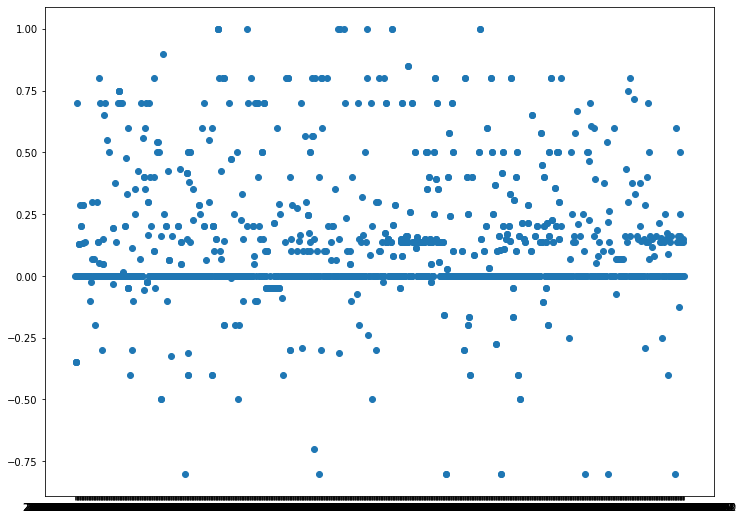

In [14]:
plt.figure(figsize=(12, 9))
plt.scatter(df_all_crypto_tweets['date'], df_all_crypto_tweets['polarity'])
plt.show()

# 2. Readdit Sentiment Analysis

In [15]:
df_btc_readdit = pd.read_csv('data/readdit_btc.csv')
df_btc_readdit.head()

,created_utc,subreddit,text
0,1617670241,Bitcoin,How much would Bitcoin have to average each da...
1,1617669969,Bitcoin,Why Bitcoiners Should Play Final Fantasy X
2,1617669944,Bitcoin,What we need the most now... more dumbass inve...
3,1617669856,Bitcoin,IRS is demanding to know BTC balanceI'm asking...
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they..."


In [16]:
df_btc_readdit['processed_text'] = df_btc_readdit['text'].apply(
    lambda x: preprocess(tokenizer.tokenize(x.lower()))
)

df_btc_readdit.head()

,created_utc,subreddit,text,processed_text
0,1617670241,Bitcoin,How much would Bitcoin have to average each da...,much would bitcoin averag day growth reach pot...
1,1617669969,Bitcoin,Why Bitcoiners Should Play Final Fantasy X,bitcoin play final fantasi x
2,1617669944,Bitcoin,What we need the most now... more dumbass inve...,need dumbass investor blind throw money crypto...
3,1617669856,Bitcoin,IRS is demanding to know BTC balanceI'm asking...,ir demand know btc balancei ask friend ir audi...
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they...",year ago found bug amp paid 50 hackeron decid ...


In [17]:
# Get Polarity
df_btc_readdit['polarity'] = df_btc_readdit['processed_text'].apply(lambda x: getSentiment(x))
df_btc_readdit.head()

# Create new column called 'sentiment' to identify -1, 0, 1
df_btc_readdit['sentiment'] = df_btc_readdit['polarity'].apply(
    lambda s: 'Positive' if s>0 else ('Neutral' if s==0 else 'Negative')
)

df_btc_readdit.head()

,created_utc,subreddit,text,processed_text,polarity,sentiment
0,1617670241,Bitcoin,How much would Bitcoin have to average each da...,much would bitcoin averag day growth reach pot...,-0.200000,Negative
1,1617669969,Bitcoin,Why Bitcoiners Should Play Final Fantasy X,bitcoin play final fantasi x,0.000000,Neutral
2,1617669944,Bitcoin,What we need the most now... more dumbass inve...,need dumbass investor blind throw money crypto...,-0.500000,Negative
3,1617669856,Bitcoin,IRS is demanding to know BTC balanceI'm asking...,ir demand know btc balancei ask friend ir audi...,0.250000,Positive
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they...",year ago found bug amp paid 50 hackeron decid ...,0.133333,Positive


In [18]:
# check and confirm there's no duplicates
df_btc_readdit.loc[df_btc_readdit['created_utc'] == 1617669627]

,created_utc,subreddit,text,processed_text,polarity,sentiment
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they...",year ago found bug amp paid 50 hackeron decid ...,0.133333,Positive


In [19]:
df_btc_readdit['sentiment'].value_counts()

Neutral     6147
Positive    4326
Negative    1534
Name: sentiment, dtype: int64

In [20]:
df_btc_readdit['rolling_7'] = df_btc_readdit[['polarity']].rolling(7).mean()
df_btc_readdit['rolling_14'] = df_btc_readdit[['polarity']].rolling(14).mean()
df_btc_readdit['rolling_200'] = df_btc_readdit[['polarity']].rolling(200).mean()

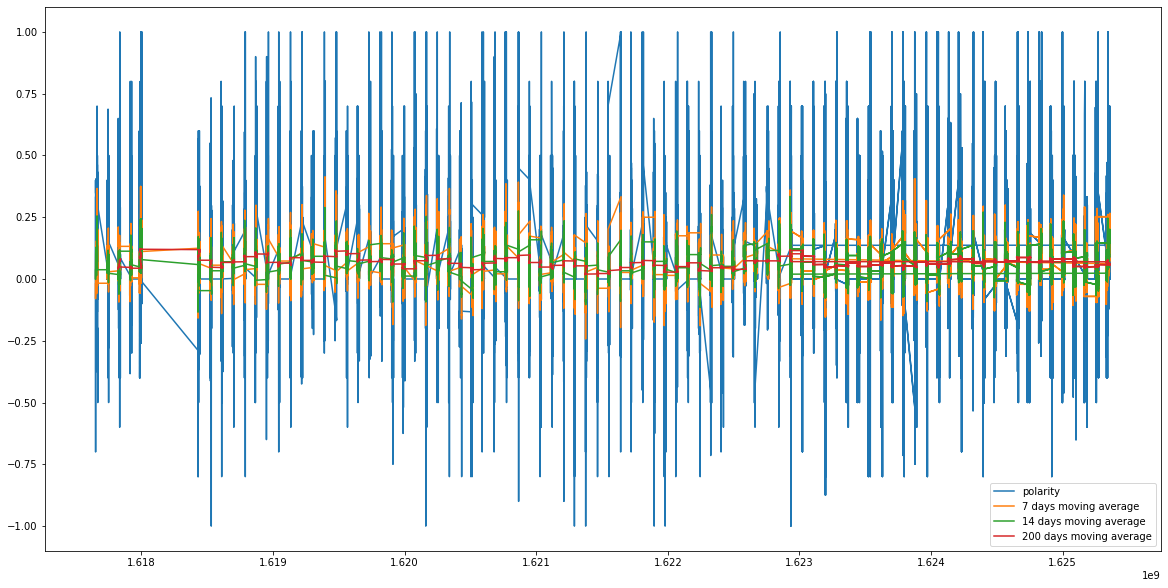

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df_btc_readdit['created_utc'], df_btc_readdit['polarity'], label='polarity')
plt.plot(df_btc_readdit['created_utc'], df_btc_readdit['rolling_7'], label='7 days moving average')
plt.plot(df_btc_readdit['created_utc'], df_btc_readdit['rolling_14'], label='14 days moving average')
plt.plot(df_btc_readdit['created_utc'], df_btc_readdit['rolling_200'], label='200 days moving average')
plt.legend()
plt.show()

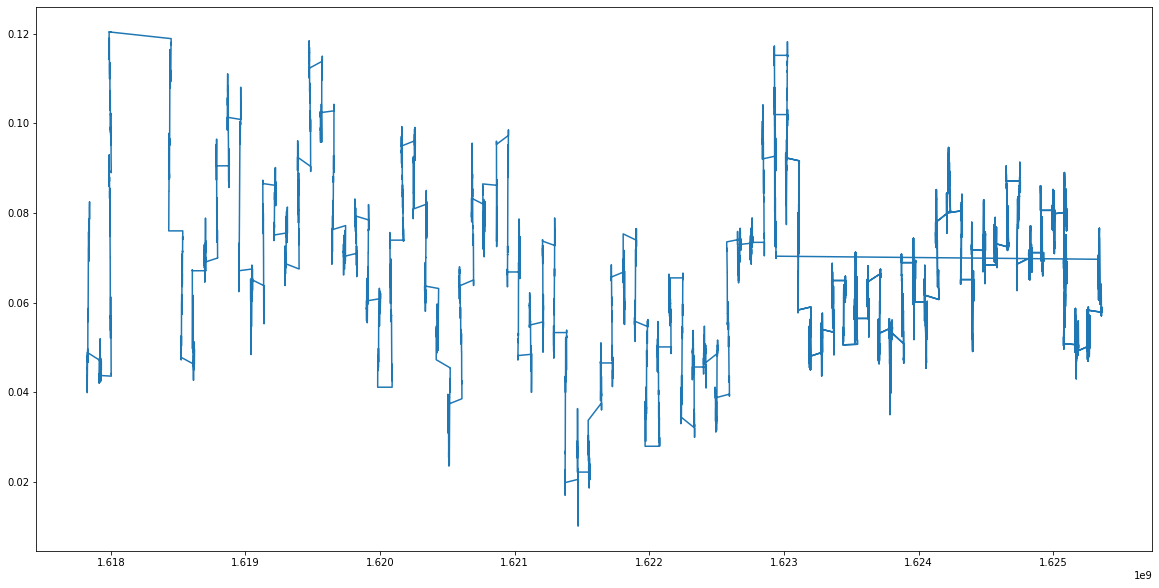

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df_btc_readdit['created_utc'], df_btc_readdit['rolling_200'])
#plt.plot(df_3months_ss[3])
#plt.plot(df_3months_ss[5])
#plt.gcf().autofmt_xdate()
plt.show()

# note: unable to plot price range and sentimental range together due to different x-axis values

In [42]:
df_btc_readdit

,created_utc,subreddit,text,processed_text,polarity,sentiment,rolling_7,rolling_14,rolling_200
0,1617670241,Bitcoin,How much would Bitcoin have to average each da...,much would bitcoin averag day growth reach pot...,-0.200000,Negative,NaN,NaN,NaN
1,1617669969,Bitcoin,Why Bitcoiners Should Play Final Fantasy X,bitcoin play final fantasi x,0.000000,Neutral,NaN,NaN,NaN
2,1617669944,Bitcoin,What we need the most now... more dumbass inve...,need dumbass investor blind throw money crypto...,-0.500000,Negative,NaN,NaN,NaN
3,1617669856,Bitcoin,IRS is demanding to know BTC balanceI'm asking...,ir demand know btc balancei ask friend ir audi...,0.250000,Positive,NaN,NaN,NaN
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they...",year ago found bug amp paid 50 hackeron decid ...,0.133333,Positive,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12002,1625331274,Bitcoin,Unstoppable,unstopp,0.000000,Neutral,-0.102381,-0.006494,0.064969
12003,1625331256,Bitcoin,Guaranteed Results with a 90% success rate,guarante result 90 success rate,0.300000,Positive,-0.002381,0.013745,0.068969
12004,1625331204,Bitcoin,Mining noob here. What equipment is recommende...,mine noob equip recommend noob start mine remov,0.000000,Neutral,-0.002381,0.013745,0.068969
12005,1625331171,Bitcoin,Libonomy blockchain[removed],libonomi blockchain remov,0.000000,Neutral,-0.002381,0.013745,0.068969


In [41]:
df_btc_readdit.to_csv('data/reddit_btc_roll.csv', index=False)

#### Average Daily Polarity/Sentiment base on utc_time

In [23]:
utc_time = ['1617670801','1617757201','1617843601','1617930001','1618016401','1618102801','1618189201','1618275601',
            '1618362001','1618448401','1618534801','1618621201','1618707601','1618794001','1618880401','1618966801',
            '1619053201','1619139601','1619226001','1619312401','1619398801','1619485201','1619571601','1619658001',
            '1619744401','1619830801','1619917201','1620003601','1620090001','1620176401','1620262801','1620349201',
            '1620435601','1620522001','1620608401','1620694801','1620781201','1620867601','1620954001','1621040401',
            '1621126801','1621213201','1621299601','1621386001','1621472401','1621558801','1621645201','1621731601',
            '1621818001','1621904401','1621990801','1622077201','1622163601','1622250001','1622336401','1622422801',
            '1622509201','1622595601','1622682001','1622768401','1622854801','1622941201','1623027601','1623114001',
            '1623200401','1623286801','1623373201','1623459601','1623546001','1623632401','1623718801','1623805201',
            '1623891601','1623978001','1624064401','1624150801','1624237201','1624323601','1624410001','1624496401',
            '1624582801','1624669201','1624755601','1624842001','1624928401','1625014801','1625101201','1625101201',
            '1625187601','1625274001','1625360401','1625446801','1625533201']

In [24]:
for i in range(0, len(utc_time)):
    utc_time[i] = int(utc_time[i])

utc_time

[1617670801,
 1617757201,
 1617843601,
 1617930001,
 1618016401,
 1618102801,
 1618189201,
 1618275601,
 1618362001,
 1618448401,
 1618534801,
 1618621201,
 1618707601,
 1618794001,
 1618880401,
 1618966801,
 1619053201,
 1619139601,
 1619226001,
 1619312401,
 1619398801,
 1619485201,
 1619571601,
 1619658001,
 1619744401,
 1619830801,
 1619917201,
 1620003601,
 1620090001,
 1620176401,
 1620262801,
 1620349201,
 1620435601,
 1620522001,
 1620608401,
 1620694801,
 1620781201,
 1620867601,
 1620954001,
 1621040401,
 1621126801,
 1621213201,
 1621299601,
 1621386001,
 1621472401,
 1621558801,
 1621645201,
 1621731601,
 1621818001,
 1621904401,
 1621990801,
 1622077201,
 1622163601,
 1622250001,
 1622336401,
 1622422801,
 1622509201,
 1622595601,
 1622682001,
 1622768401,
 1622854801,
 1622941201,
 1623027601,
 1623114001,
 1623200401,
 1623286801,
 1623373201,
 1623459601,
 1623546001,
 1623632401,
 1623718801,
 1623805201,
 1623891601,
 1623978001,
 1624064401,
 1624150801,
 1624237201,

In [25]:
df_btc_readdit.head()

,created_utc,subreddit,text,processed_text,polarity,sentiment,rolling_7,rolling_14,rolling_200
0,1617670241,Bitcoin,How much would Bitcoin have to average each da...,much would bitcoin averag day growth reach pot...,-0.200000,Negative,NaN,NaN,NaN
1,1617669969,Bitcoin,Why Bitcoiners Should Play Final Fantasy X,bitcoin play final fantasi x,0.000000,Neutral,NaN,NaN,NaN
2,1617669944,Bitcoin,What we need the most now... more dumbass inve...,need dumbass investor blind throw money crypto...,-0.500000,Negative,NaN,NaN,NaN
3,1617669856,Bitcoin,IRS is demanding to know BTC balanceI'm asking...,ir demand know btc balancei ask friend ir audi...,0.250000,Positive,NaN,NaN,NaN
4,1617669627,Bitcoin,"A year ago, I found a bug in AT&amp;T and they...",year ago found bug amp paid 50 hackeron decid ...,0.133333,Positive,NaN,NaN,NaN


In [26]:
data = df_btc_readdit[['created_utc', 'polarity']]
data

,created_utc,polarity
0,1617670241,-0.200000
1,1617669969,0.000000
2,1617669944,-0.500000
3,1617669856,0.250000
4,1617669627,0.133333
...,...,...
12002,1625331274,0.000000
12003,1625331256,0.300000
12004,1625331204,0.000000
12005,1625331171,0.000000


In [27]:
data[(data['created_utc'] > 1617670801) & (data['created_utc'] < 1617757201)].mean()[1]

0.06299348796618573

In [28]:
utc_time[1:]

[1617757201,
 1617843601,
 1617930001,
 1618016401,
 1618102801,
 1618189201,
 1618275601,
 1618362001,
 1618448401,
 1618534801,
 1618621201,
 1618707601,
 1618794001,
 1618880401,
 1618966801,
 1619053201,
 1619139601,
 1619226001,
 1619312401,
 1619398801,
 1619485201,
 1619571601,
 1619658001,
 1619744401,
 1619830801,
 1619917201,
 1620003601,
 1620090001,
 1620176401,
 1620262801,
 1620349201,
 1620435601,
 1620522001,
 1620608401,
 1620694801,
 1620781201,
 1620867601,
 1620954001,
 1621040401,
 1621126801,
 1621213201,
 1621299601,
 1621386001,
 1621472401,
 1621558801,
 1621645201,
 1621731601,
 1621818001,
 1621904401,
 1621990801,
 1622077201,
 1622163601,
 1622250001,
 1622336401,
 1622422801,
 1622509201,
 1622595601,
 1622682001,
 1622768401,
 1622854801,
 1622941201,
 1623027601,
 1623114001,
 1623200401,
 1623286801,
 1623373201,
 1623459601,
 1623546001,
 1623632401,
 1623718801,
 1623805201,
 1623891601,
 1623978001,
 1624064401,
 1624150801,
 1624237201,
 1624323601,

In [29]:
# create a new column called 'daily_avg_pol' and take the average sentiment(polarity) of the readdit post of each day
data_avg_polarity = []

for i in range(len(utc_time[:-1])):
    d1 = data[(data['created_utc'] > utc_time[i]) & (data['created_utc'] < utc_time[i+1])].mean()[1]
    data_avg_polarity.append(d1)

data_avg_polarity

[0.06299348796618573,
 0.02817895693460869,
 0.05815618215174318,
 0.12038146859753998,
 nan,
 nan,
 nan,
 nan,
 0.03190363297378805,
 0.06136195935470669,
 0.07415825750364316,
 0.06509932234623957,
 0.11654966989520021,
 0.0859897645154088,
 0.048537112933362915,
 0.07970656372082395,
 0.09176393764742491,
 0.05926487897023611,
 0.0781905615238224,
 0.10523339962706847,
 0.12027908420944139,
 0.08326344361540068,
 0.06709113243839165,
 0.07525986652236652,
 0.08345248588030846,
 0.03723874503968254,
 0.045880892209588776,
 0.10020424300727332,
 0.09058356875808177,
 0.07106988640444524,
 0.0563254670148692,
 0.038149744468494465,
 0.03714689472674032,
 0.09592955120035714,
 0.06851023809193454,
 0.10484432955232488,
 0.0871230486685032,
 0.047856233096238154,
 0.043304783225547,
 0.06291317314457223,
 0.08332514630062478,
 0.02409431102957888,
 0.015515129493522349,
 0.028808895775941222,
 0.03677089293115628,
 0.056620993372096334,
 0.06979861536148355,
 0.08006904946091759,
 0.0316

In [30]:
data_avg_polarity = pd.DataFrame(data_avg_polarity)
data_avg_polarity['utc_time'] = utc_time[1:]
data_avg_polarity.rename(columns={0: 'daily_avg_polarity'}, inplace=True)
data_avg_polarity

,daily_avg_polarity,utc_time
0,0.062993,1617757201
1,0.028179,1617843601
2,0.058156,1617930001
3,0.120381,1618016401
4,NaN,1618102801
...,...,...
87,0.050643,1625187601
88,0.065517,1625274001
89,0.073789,1625360401
90,NaN,1625446801


In [31]:
# convert utc_time to datetime 
data_avg_polarity['date'] = pd.to_datetime(data_avg_polarity['utc_time'], unit='s')
data_avg_polarity

,daily_avg_polarity,utc_time,date
0,0.062993,1617757201,2021-04-07 01:00:01
1,0.028179,1617843601,2021-04-08 01:00:01
2,0.058156,1617930001,2021-04-09 01:00:01
3,0.120381,1618016401,2021-04-10 01:00:01
4,NaN,1618102801,2021-04-11 01:00:01
...,...,...,...
87,0.050643,1625187601,2021-07-02 01:00:01
88,0.065517,1625274001,2021-07-03 01:00:01
89,0.073789,1625360401,2021-07-04 01:00:01
90,NaN,1625446801,2021-07-05 01:00:01


### Readdit Sentiment V.S. Bitcoin Price last 3 months

In [32]:
# load btc historical price data
df_btc_hist = pd.read_csv('cryptodata/cleaned_btc.csv')
df_btc_hist

,Date,High,Low,Open,Close,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,1.085995e+09
...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11


In [33]:
df_btc_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Open       2991 non-null   float64
 4   Close      2991 non-null   float64
 5   Marketcap  2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.3+ KB


In [34]:
df_btc_hist['Date'] = pd.to_datetime(df_btc_hist['Date'])

In [35]:
df_btc_hist.set_index('Date', inplace=True)
df_btc_hist.sort_index(inplace=True)
df_btc_hist

,High,Low,Open,Close,Marketcap
Date,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,1.085995e+09
...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11


In [36]:
df_btc_apr = df_btc_hist['2021-04']
df_btc_may = df_btc_hist['2021-05']
df_btc_june = df_btc_hist['2021-06']
df_btc_july = df_btc_hist['2021-07']

In [37]:
df_btc_apr['Close_7days'] = df_btc_apr['Close'].rolling(7).mean()

<ipython-input-37-a4785d7072e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_apr['Close_7days'] = df_btc_apr['Close'].rolling(7).mean()


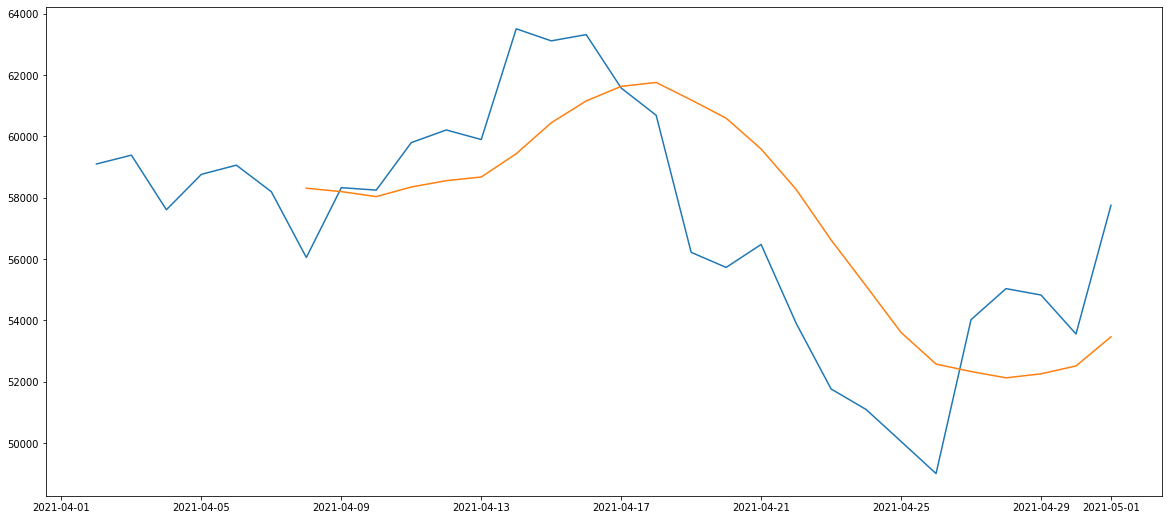

In [38]:
plt.figure(figsize=(20, 9))
plt.plot(df_btc_apr['Close'])
plt.plot(df_btc_apr['Close_7days'])

In [43]:
df_3months = df_btc_apr.append(df_btc_may)
df_3months = df_3months.append(df_btc_june)
df_3months = df_3months.append(df_btc_july)
df_3months.drop(columns='Close_7days', inplace=True)
df_3months['Close_7days'] = df_3months['Close'].rolling(7).mean()

In [44]:
df_3months

,High,Low,Open,Close,Marketcap,Close_7days
Date,,,,,,
2021-04-01 23:59:59,59586.072249,58505.279054,58926.564147,59095.807978,1.103378e+12,NaN
2021-04-02 23:59:59,60267.187650,58869.279968,59098.879070,59384.313359,1.108814e+12,NaN
2021-04-03 23:59:59,60110.268461,57603.889174,59397.408462,57603.889174,1.075617e+12,NaN
2021-04-04 23:59:59,58913.747792,57168.675782,57604.838618,58758.556291,1.097233e+12,NaN
2021-04-05 23:59:59,59891.296908,57694.826021,58760.873261,59057.878966,1.102881e+12,NaN
...,...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387


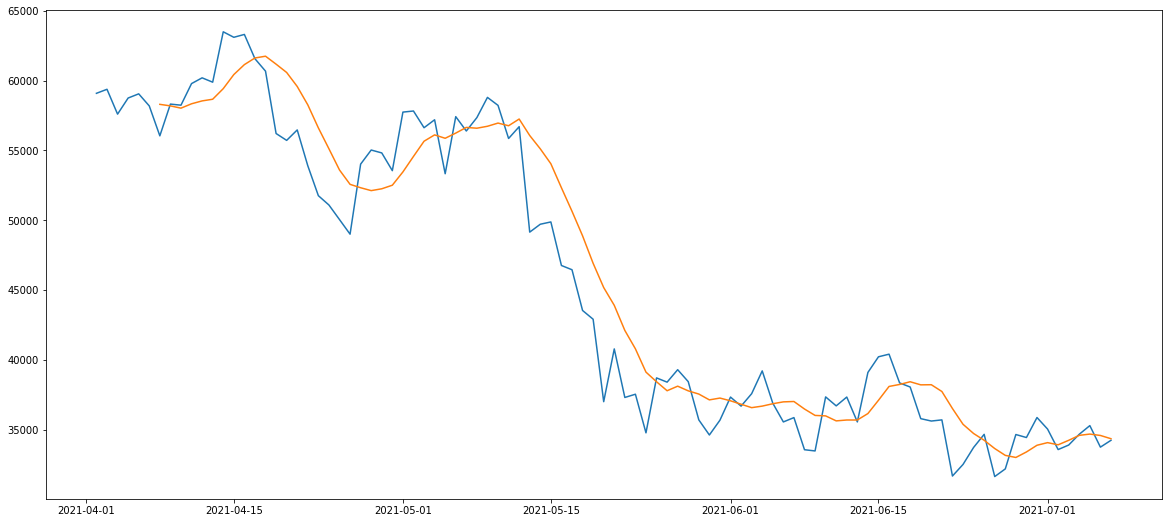

In [45]:
plt.figure(figsize=(20, 9))
plt.plot(df_3months['Close'])
plt.plot(df_3months['Close_7days'])
#plt.plot(df_3months_ss[5])

#### Plot normalized 3 months prices

In [46]:
# standardize / normalize
X = df_3months.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_3months_ss = pd.DataFrame(X_scaled)
df_3months_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
 2   2       97 non-null     float64
 3   3       97 non-null     float64
 4   4       97 non-null     float64
 5   5       91 non-null     float64
dtypes: float64(6)
memory usage: 4.7 KB


In [47]:
df_3months_ss

,0,1,2,3,4,5
0,0.836247,0.888829,0.856019,0.861680,0.860148,NaN
1,0.857383,0.899755,0.861416,0.870734,0.869309,NaN
2,0.852513,0.861773,0.870765,0.814861,0.813365,NaN
3,0.815384,0.848710,0.814623,0.851097,0.849792,NaN
4,0.845718,0.864503,0.850829,0.860490,0.859310,NaN
...,...,...,...,...,...,...
92,0.040403,0.116375,0.061227,0.070900,0.071577,0.042767
93,0.070493,0.135345,0.070774,0.095111,0.095994,0.055102
94,0.102403,0.165175,0.096179,0.114543,0.115602,0.058273
95,0.082132,0.129671,0.115559,0.066160,0.066935,0.054853


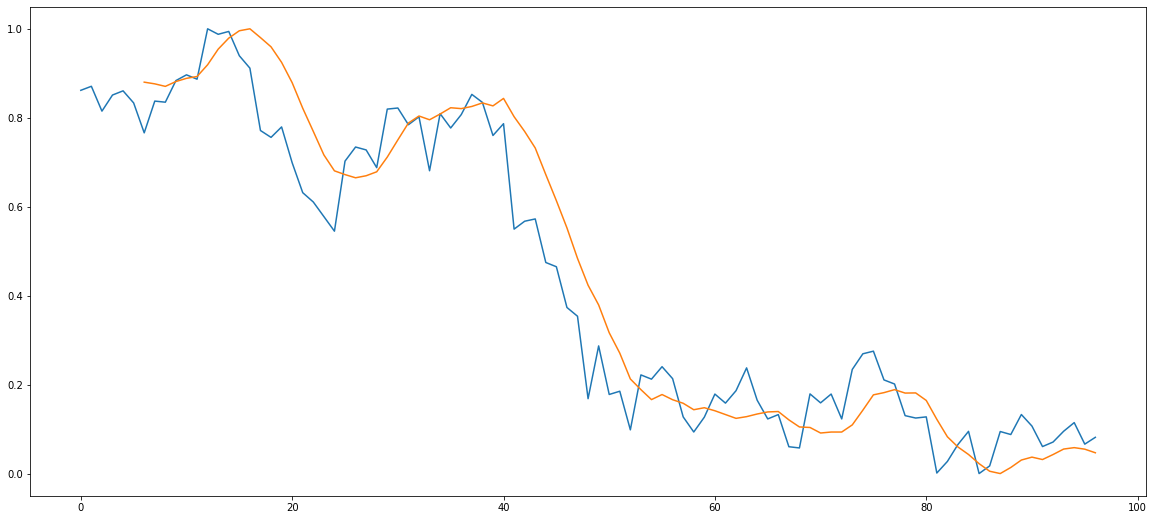

In [48]:
# plot the normalized price fluctuation between April and July
plt.figure(figsize=(20, 9))
plt.plot(df_3months_ss[3])
plt.plot(df_3months_ss[5])

### Combined Daily Closing Price with Daily Polarity

In [49]:
data_avg_polarity

,daily_avg_polarity,utc_time,date
0,0.062993,1617757201,2021-04-07 01:00:01
1,0.028179,1617843601,2021-04-08 01:00:01
2,0.058156,1617930001,2021-04-09 01:00:01
3,0.120381,1618016401,2021-04-10 01:00:01
4,NaN,1618102801,2021-04-11 01:00:01
...,...,...,...
87,0.050643,1625187601,2021-07-02 01:00:01
88,0.065517,1625274001,2021-07-03 01:00:01
89,0.073789,1625360401,2021-07-04 01:00:01
90,NaN,1625446801,2021-07-05 01:00:01


In [50]:
#drop duplicates
data_avg_polarity.drop_duplicates(subset=['date'], inplace=True, keep='last', ignore_index=True)

#set index to date column
data_avg_polarity.set_index('date', inplace=True)

# convert date index to just show date, get rid of time
data_avg_polarity.index = data_avg_polarity.index.date

data_avg_polarity

,daily_avg_polarity,utc_time
2021-04-07,0.062993,1617757201
2021-04-08,0.028179,1617843601
2021-04-09,0.058156,1617930001
2021-04-10,0.120381,1618016401
2021-04-11,NaN,1618102801
...,...,...
2021-07-02,0.050643,1625187601
2021-07-03,0.065517,1625274001
2021-07-04,0.073789,1625360401
2021-07-05,NaN,1625446801


In [51]:
df_3months

,High,Low,Open,Close,Marketcap,Close_7days
Date,,,,,,
2021-04-01 23:59:59,59586.072249,58505.279054,58926.564147,59095.807978,1.103378e+12,NaN
2021-04-02 23:59:59,60267.187650,58869.279968,59098.879070,59384.313359,1.108814e+12,NaN
2021-04-03 23:59:59,60110.268461,57603.889174,59397.408462,57603.889174,1.075617e+12,NaN
2021-04-04 23:59:59,58913.747792,57168.675782,57604.838618,58758.556291,1.097233e+12,NaN
2021-04-05 23:59:59,59891.296908,57694.826021,58760.873261,59057.878966,1.102881e+12,NaN
...,...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387


In [52]:
# df_3months

# drop April 1st to April 6th
df_3months.drop(df_3months.index[0:6], inplace=True)

# convert date index to just show date, get rid of time
df_3months.index = df_3months.index.date

df_3months

,High,Low,Open,Close,Marketcap,Close_7days
2021-04-07,58731.142901,55604.023592,58186.508534,56048.937813,1.046793e+12,58305.963181
2021-04-08,58338.738225,55879.084195,56099.913111,58323.953580,1.089334e+12,58195.698267
2021-04-09,58937.046516,57807.863842,58326.563620,58245.003001,1.087911e+12,58032.939644
2021-04-10,61276.665366,58038.706278,58253.776809,59793.235410,1.116890e+12,58345.703392
2021-04-11,60790.555315,59289.795631,59846.230786,60204.964914,1.124636e+12,58552.333195
...,...,...,...,...,...,...
2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114
2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219
2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387
2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34582.873122


In [53]:
data_avg_polarity['date'] = data_avg_polarity['date'].apply(lambda x:x.strftime('20%y-%m-%d'))
data_avg_polarity

KeyError: 'date'

In [54]:
data_avg_polarity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2021-04-07 to 2021-07-06
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   daily_avg_polarity  84 non-null     float64
 1   utc_time            91 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.1+ KB


In [55]:
df_3months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2021-04-07 to 2021-07-06
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         91 non-null     float64
 1   Low          91 non-null     float64
 2   Open         91 non-null     float64
 3   Close        91 non-null     float64
 4   Marketcap    91 non-null     float64
 5   Close_7days  91 non-null     float64
dtypes: float64(6)
memory usage: 5.0+ KB


In [56]:
# join data_avg_polarity dataframe and df_3months dataframe
df_3months_price_polarity = df_3months.join(data_avg_polarity)

# drop utc_time column
df_3months_price_polarity.drop(columns='utc_time', inplace=True)

# replace all nan values with mean of that column
df_3months_price_polarity['daily_avg_polarity'].fillna(df_3months_price_polarity['daily_avg_polarity'].mean())

df_3months_price_polarity

,High,Low,Open,Close,Marketcap,Close_7days,daily_avg_polarity
2021-04-07,58731.142901,55604.023592,58186.508534,56048.937813,1.046793e+12,58305.963181,0.062993
2021-04-08,58338.738225,55879.084195,56099.913111,58323.953580,1.089334e+12,58195.698267,0.028179
2021-04-09,58937.046516,57807.863842,58326.563620,58245.003001,1.087911e+12,58032.939644,0.058156
2021-04-10,61276.665366,58038.706278,58253.776809,59793.235410,1.116890e+12,58345.703392,0.120381
2021-04-11,60790.555315,59289.795631,59846.230786,60204.964914,1.124636e+12,58552.333195,NaN
...,...,...,...,...,...,...,...
2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114,0.050643
2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219,0.065517
2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387,0.073789
2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34582.873122,NaN


In [57]:
# replace all nan values with mean of daily_avg_polarity column
df_3months_price_polarity['daily_avg_polarity'].fillna(df_3months_price_polarity['daily_avg_polarity'].mean(), inplace=True)

df_3months_price_polarity

,High,Low,Open,Close,Marketcap,Close_7days,daily_avg_polarity
2021-04-07,58731.142901,55604.023592,58186.508534,56048.937813,1.046793e+12,58305.963181,0.062993
2021-04-08,58338.738225,55879.084195,56099.913111,58323.953580,1.089334e+12,58195.698267,0.028179
2021-04-09,58937.046516,57807.863842,58326.563620,58245.003001,1.087911e+12,58032.939644,0.058156
2021-04-10,61276.665366,58038.706278,58253.776809,59793.235410,1.116890e+12,58345.703392,0.120381
2021-04-11,60790.555315,59289.795631,59846.230786,60204.964914,1.124636e+12,58552.333195,0.066327
...,...,...,...,...,...,...,...
2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114,0.050643
2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219,0.065517
2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387,0.073789
2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34582.873122,0.066327


In [58]:
# export to csv for prediction
df_3months_price_polarity.to_csv('data/df_3m_price_polarity.csv')

## 2. Google Trend Analysis

In [59]:
# load data
google = pd.read_csv('data/google_trend_3m.csv')
google

,date,bitcoin,crypto,ethereum,cardano,dogecoin,isPartial
0,2021-04-07,50,16,3,3,3,False
1,2021-04-08,38,16,8,0,0,False
2,2021-04-09,24,16,5,0,3,False
3,2021-04-10,45,18,3,0,0,False
4,2021-04-11,48,15,9,0,6,False
...,...,...,...,...,...,...,...
86,2021-07-02,40,3,14,3,0,False
87,2021-07-03,31,9,9,3,0,False
88,2021-07-04,22,13,6,3,3,False
89,2021-07-05,17,3,3,0,3,False


In [60]:
google_btc = google.drop(columns=['crypto', 'ethereum', 'cardano', 'dogecoin', 'isPartial'])
google_btc

,date,bitcoin
0,2021-04-07,50
1,2021-04-08,38
2,2021-04-09,24
3,2021-04-10,45
4,2021-04-11,48
...,...,...
86,2021-07-02,40
87,2021-07-03,31
88,2021-07-04,22
89,2021-07-05,17


In [61]:
google_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     91 non-null     object
 1   bitcoin  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [62]:
# set index to date column
google_btc.set_index('date', inplace=True)

# convert date index to just show date, get rid of time
#google_btc.index = google_btc.index.date

google_btc

,bitcoin
date,
2021-04-07,50
2021-04-08,38
2021-04-09,24
2021-04-10,45
2021-04-11,48
...,...
2021-07-02,40
2021-07-03,31
2021-07-04,22


In [63]:
google_btc.reset_index(inplace=True)

In [64]:
google_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     91 non-null     object
 1   bitcoin  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [75]:
google_btc['date']= pd.to_datetime(google_btc['date'])
df_3months_price_polarity['date']=pd.to_datetime(df_3months_price_polarity['date'])

In [66]:
df_3months_price_polarity.reset_index(inplace=True)
df_3months_price_polarity.rename(columns={'index': 'date'}, inplace=True)
df_3months_price_polarity

,date,High,Low,Open,Close,Marketcap,Close_7days,daily_avg_polarity
0,2021-04-07,58731.142901,55604.023592,58186.508534,56048.937813,1.046793e+12,58305.963181,0.062993
1,2021-04-08,58338.738225,55879.084195,56099.913111,58323.953580,1.089334e+12,58195.698267,0.028179
2,2021-04-09,58937.046516,57807.863842,58326.563620,58245.003001,1.087911e+12,58032.939644,0.058156
3,2021-04-10,61276.665366,58038.706278,58253.776809,59793.235410,1.116890e+12,58345.703392,0.120381
4,2021-04-11,60790.555315,59289.795631,59846.230786,60204.964914,1.124636e+12,58552.333195,0.066327
...,...,...,...,...,...,...,...,...
86,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114,0.050643
87,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219,0.065517
88,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387,0.073789
89,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34582.873122,0.066327


In [76]:
df_3months_price_polarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                91 non-null     datetime64[ns]
 1   High                91 non-null     float64       
 2   Low                 91 non-null     float64       
 3   Open                91 non-null     float64       
 4   Close               91 non-null     float64       
 5   Marketcap           91 non-null     float64       
 6   Close_7days         91 non-null     float64       
 7   daily_avg_polarity  91 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 5.8 KB


In [72]:
df_3months_price_polarity['date'] = pd.to_datetime(df_3months_price_polarity['date'])

In [73]:
# merge dataframes to create a new dataframe with closing price, daily avg readdit polarity, and google trend on btc
dfinal = df_3months_price_polarity.merge(google_btc, on='date')
dfinal

,date,High,Low,Open,Close,Marketcap,Close_7days,daily_avg_polarity,bitcoin
0,2021-04-07,58731.142901,55604.023592,58186.508534,56048.937813,1.046793e+12,58305.963181,0.062993,50
1,2021-04-08,58338.738225,55879.084195,56099.913111,58323.953580,1.089334e+12,58195.698267,0.028179,38
2,2021-04-09,58937.046516,57807.863842,58326.563620,58245.003001,1.087911e+12,58032.939644,0.058156,24
3,2021-04-10,61276.665366,58038.706278,58253.776809,59793.235410,1.116890e+12,58345.703392,0.120381,45
4,2021-04-11,60790.555315,59289.795631,59846.230786,60204.964914,1.124636e+12,58552.333195,0.066327,48
...,...,...,...,...,...,...,...,...,...
86,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,34235.434114,0.050643,40
87,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34590.044219,0.065517,31
88,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34681.206387,0.073789,22
89,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34582.873122,0.066327,17


In [74]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                91 non-null     datetime64[ns]
 1   High                91 non-null     float64       
 2   Low                 91 non-null     float64       
 3   Open                91 non-null     float64       
 4   Close               91 non-null     float64       
 5   Marketcap           91 non-null     float64       
 6   Close_7days         91 non-null     float64       
 7   daily_avg_polarity  91 non-null     float64       
 8   bitcoin             91 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 7.1 KB


In [ ]:
# export dataframe to csv
dfinal.to_csv('data/btc_price_polarity_trend.csv', index=False)